# Smart Factory Energy Prediction Challenge
## Problem Overview

    You've been hired as a data scientist for SmartManufacture Inc., a leading industrial automation company. The company has deployed an extensive sensor network throughout one of their client's manufacturing facilities to monitor environmental conditions and energy usage.

    The client is concerned about the increasing energy costs associated with their manufacturing equipment. They want to implement a predictive system that can forecast equipment energy consumption based on various environmental factors and sensor readings from different zones of the factory.

In [2]:
!pip install missingpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.6 MB/s eta 0:00:00


# Importing required packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Setting up configurations

In [4]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

# Reading CSV File

In [5]:
df=pd.read_csv("/kaggle/input/energy-consumption-dataset/DS-Intern-Assignment-main/data/data.csv")

# Displaying Top-5 datapoints

In [16]:
df.head()

timestamp equipment_energy_consumption     lighting_energy  \
0  2016-01-11 17:00:00                         60.0  -77.78778596503064   
1  2016-01-11 17:10:00                         60.0                30.0   
2  2016-01-11 17:20:00                         50.0                30.0   
3  2016-01-11 17:30:00                         50.0                40.0   
4  2016-01-11 17:40:00                         60.0                40.0   

   zone1_temperature     zone1_humidity zone2_temperature  zone2_humidity  \
0  33.74660933896648  47.59666666666671              19.2       44.790000   
1              19.89  46.69333333333329              19.2       44.722500   
2              19.89               46.3              19.2       44.626667   
3  33.74660933896648   46.0666666666667              19.2       44.590000   
4              19.89  46.33333333333329              19.2       44.530000   

   zone3_temperature  zone3_humidity  zone4_temperature  zone4_humidity  \
0              19.79             NaN          19.000000       45.566667   
1              19.79       44.790000          19.000000       45.992500   
2              19.79       44.933333          35.921144       45.890000   
3              19.79       45.000000                NaN       45.723333   
4              19.79       45.000000          18.890000       45.530000   

   zone5_temperature  zone5_humidity  zone6_temperature  zone6_humidity  \
0          17.166667           55.20                NaN       84.256667   
1          17.166667           55.20           6.833333       84.063333   
2                NaN           55.09           6.560000       83.156667   
3          17.166667           55.09           6.433333       83.423333   
4          17.200000           55.09           6.366667       84.893333   

   zone7_temperature  zone7_humidity  zone8_temperature  zone8_humidity  \
0          17.200000       41.626667               18.2       48.900000   
1          17.200000             NaN               18.2       48.863333   
2          17.200000       41.433333               18.2       48.730000   
3          17.133333       41.290000               18.1       94.385668   
4          17.200000       41.230000               18.1       48.590000   

   zone9_temperature  zone9_humidity  outdoor_temperature  \
0          17.033333           45.53             6.600000   
1          17.066667           45.56             6.483333   
2          17.000000           45.50             6.366667   
3          17.000000           45.40             6.250000   
4           4.476511           45.40             6.133333   

   atmospheric_pressure  outdoor_humidity  wind_speed  visibility_index  \
0                 733.5              92.0    7.000000         63.000000   
1                 733.6              92.0    6.666667         59.166667   
2                 733.7              92.0    6.333333         55.333333   
3                 733.8              92.0    6.000000         51.500000   
4                 733.9              92.0    5.666667         47.666667   

   dew_point  random_variable1  random_variable2  
0   5.300000         13.275433         13.275433  
1   5.200000         18.606195         18.606195  
2   5.100000         28.642668         28.642668  
3  37.673716         45.410389         45.410389  
4   4.900000         10.084097         10.084097

# Exploratory Data Analysis

## 1. Dataset Shape

In [6]:
df.shape

(16857, 29)

* Dataset contains **16857 datapoints (rows)** and **29 features (columns)** including target feature

## 2. Dataset Features

In [7]:
df.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

## 3. Checking Missing Values

In [8]:
print(f"Feature Name:  Missing values   ======>   Missing value percentage")
for features in df.columns:
    print("="*110)
    print(f"{features}: {df[features].isnull().sum()}/{df.shape[0]}   ======>  {round((df[features].isnull().sum()/df.shape[0])*100, 2)}%")

Feature Name:  Missing values   ======>   Missing value percentage
timestamp: 0/16857   ======>  0.0%
equipment_energy_consumption: 844/16857   ======>  5.01%
lighting_energy: 809/16857   ======>  4.8%
zone1_temperature: 867/16857   ======>  5.14%
zone1_humidity: 801/16857   ======>  4.75%
zone2_temperature: 853/16857   ======>  5.06%
zone2_humidity: 867/16857   ======>  5.14%
zone3_temperature: 802/16857   ======>  4.76%
zone3_humidity: 878/16857   ======>  5.21%
zone4_temperature: 816/16857   ======>  4.84%
zone4_humidity: 781/16857   ======>  4.63%
zone5_temperature: 838/16857   ======>  4.97%
zone5_humidity: 801/16857   ======>  4.75%
zone6_temperature: 848/16857   ======>  5.03%
zone6_humidity: 847/16857   ======>  5.02%
zone7_temperature: 794/16857   ======>  4.71%
zone7_humidity: 805/16857   ======>  4.78%
zone8_temperature: 848/16857   ======>  5.03%
zone8_humidity: 777/16857   ======>  4.61%
zone9_temperature: 773/16857   ======>  4.59%
zone9_humidity: 888/16857   ======>  5.2

## 4. Checking Missing Value pattern

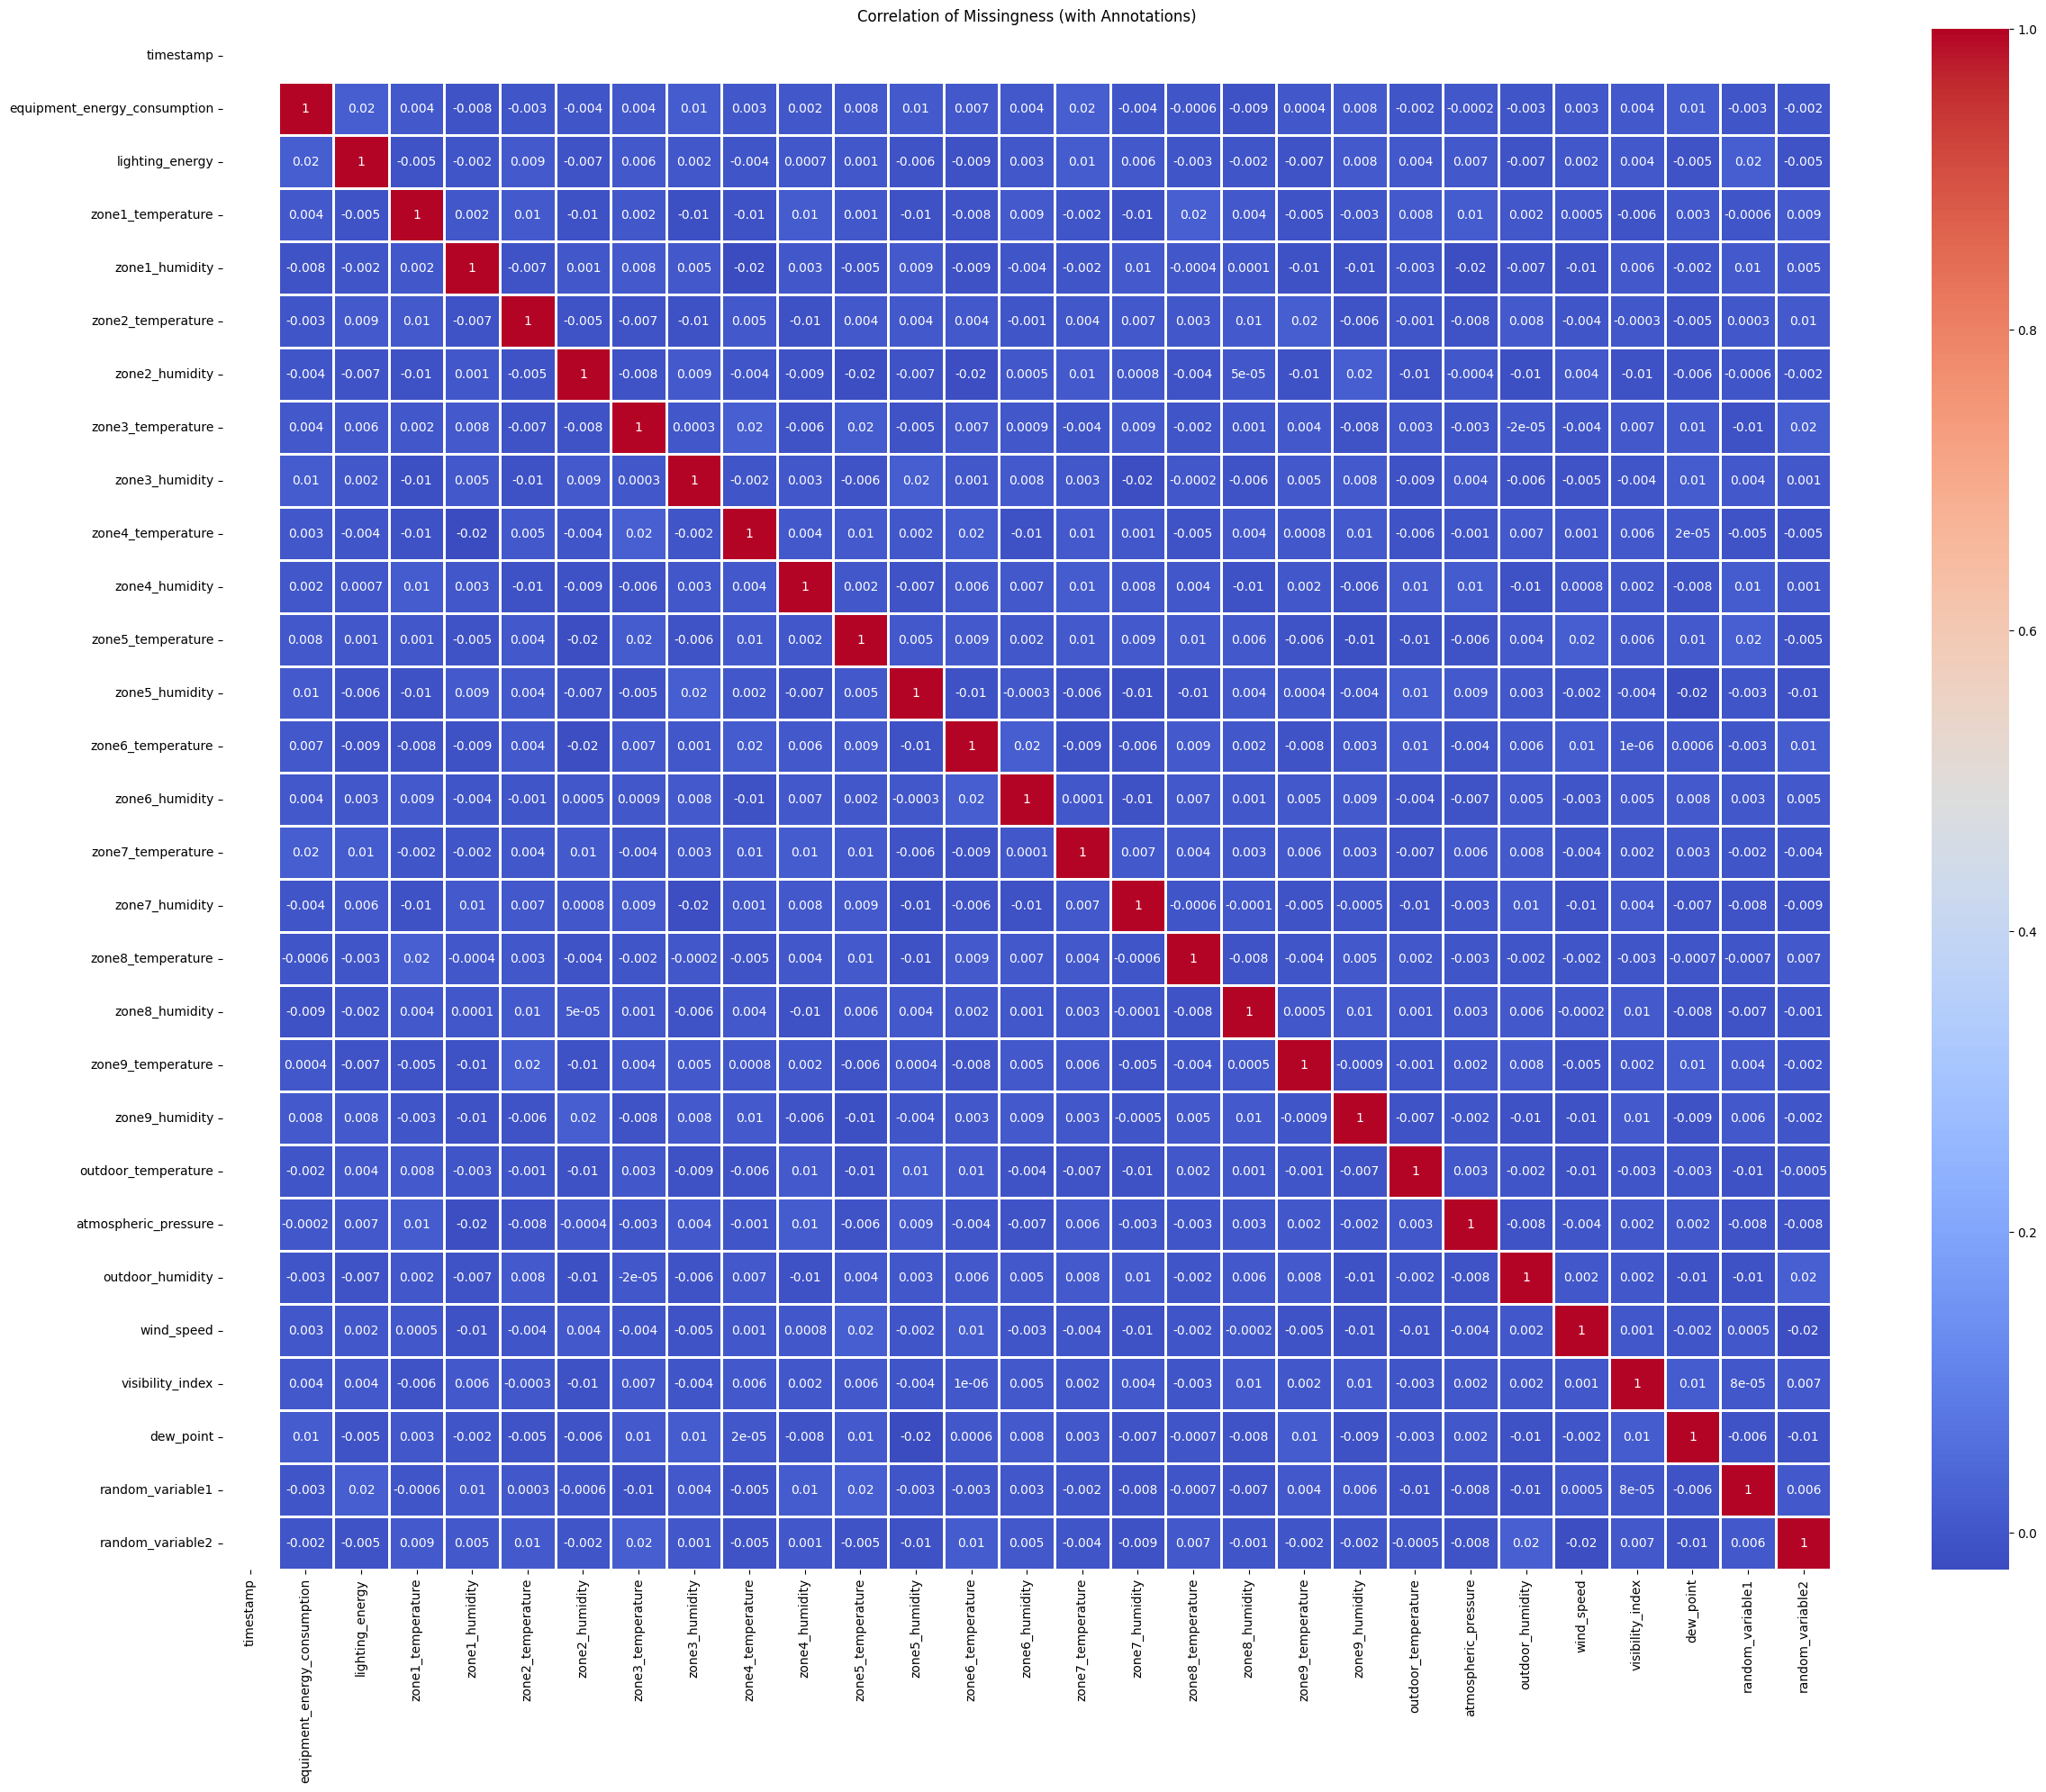

In [11]:
# Create missingness indicator (1 if missing, 0 otherwise)
missing_indicator = df.isnull().astype(int)

# Compute correlation between missing values
missing_corr = missing_indicator.corr()

# Plot with annotations
plt.figure(figsize=(25, 20))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm", cbar=True, linewidths=2, fmt='.1g')
plt.title("Correlation of Missingness (with Annotations)")
plt.tight_layout()
plt.show()


* Very weak correlation shown between missing value features which means the Missing pattern is MCAR (Missing completely at Random).

## 5. Checking datatypes and number of Non-Null values of features

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

## 6. Checking distinct values of categorical features of dataset

In [18]:
# Defining function to extract feature names with object datatype in a list.
def get_cat_features(df):
    cat_features=[features for features in df.columns if df[features].dtype=='object']
    return cat_features

# invoking `get_cat_features` function.
cat_features=get_cat_features(df)

# Displaying distinct values of each feature having object datatype.
for features in cat_features:
    print("Feature:",features)
    print(df[features].unique())
    print("="*110)

Feature: timestamp
['2016-01-11 17:00:00' '2016-01-11 17:10:00' '2016-01-11 17:20:00' ...
 '2016-11-03 00:50:00' '2016-11-04 13:20:00' '2016-12-01 15:50:00']
Feature: equipment_energy_consumption
['60.0' '50.0' nan '70.0' '230.0' '580.0' '430.0' '250.0' '100.0' '90.0'
 '80.0' '140.0' '120.0' '190.0' '110.0' '400.0' '390.0' '240.0' '40.0'
 '30.0' '310.0' '380.0' '370.0' '20.0' '-110.0' '260.0' '500.0' '450.0'
 '220.0' '170.0' '290.0' '130.0' '200.0' '210.0' '-50.0' '-20.0'
 '-944.5664110012307' '350.0' '300.0' '-400.0' '340.0' '150.0' '330.0'
 '420.0' '520.0' '360.0' '-270.0' '-30.0' '180.0' '550.0' '690.0' '620.0'
 '610.0' '490.0' '410.0' '320.0' '270.0' '740.0' '910.0' '510.0' '790.0'
 '1139.9856929495108' '-40.0' 'error' '460.0' '160.0' '480.0' '280.0'
 '-220.0' '560.0' '1080.0' '750.0' '???' '470.0' '440.0' '-80.0' '800.0'
 '-790.0' '540.0' '530.0' 'check' '660.0' '630.0' '600.0' '10.0' '570.0'
 '830.0' '1070.0' '890.0' '590.0' '-1139.9856929495108' '850.0' '710.0'
 '680.0' '-120.0'

* Each Feature contains Numeric values in string datatype except timestamp.
* Features also contains missing values as Nan, ??, unknown, etc.

## 7. Checking Measures of central tendency

In [14]:
temp=df.copy()
# Replacing Non numeric values like ??, unknown etc. with Nan
temp[['equipment_energy_consumption(cd)', 'lighting_energy(cd)', 'zone1_temperature(cd)', 'zone1_humidity(cd)', 'zone2_temperature(cd)']]=temp[['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']].replace(r'[^0-9.-]',np.nan, regex=True)
# Typecasting object datatype as float
temp[['equipment_energy_consumption(cd)', 'lighting_energy(cd)', 'zone1_temperature(cd)', 'zone1_humidity(cd)', 'zone2_temperature(cd)']]=temp[['equipment_energy_consumption(cd)', 'lighting_energy(cd)', 'zone1_temperature(cd)', 'zone1_humidity(cd)', 'zone2_temperature(cd)']].astype(float)
# Dropping unnecessary features
temp.drop(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature'],axis=1, inplace=True)

In [15]:
temp.describe()

zone2_humidity  zone3_temperature  zone3_humidity  zone4_temperature  \
count    15990.000000       16055.000000    15979.000000       16041.000000   
mean        39.494553          21.665733       38.201314          20.239922   
std         10.129513           2.594309       10.144388           2.783050   
min        -77.265503           6.543921      -71.406273           4.613485   
25%         37.757500          20.533333       36.592500          19.266667   
50%         40.293333          21.767500       38.400000          20.290000   
75%         43.000000          22.760000       41.433333          21.356667   
max         77.265503          36.823982       71.406273          35.921144   

       zone4_humidity  zone5_temperature  zone5_humidity  zone6_temperature  \
count    16076.000000       16019.000000    16056.000000       16009.000000   
mean        37.945608          19.052613       50.289131           6.469934   
std         10.769813           2.346158       18.722516           8.867993   
min        -81.446225           5.921094     -141.640143         -42.987365   
25%         35.200000          18.061111       45.290000           2.930000   
50%         38.090000          19.050000       48.854429           6.263333   
75%         41.560833          20.100000       53.918333           9.690000   
max         81.446225          32.157594      141.640143          55.932271   

       zone6_humidity  zone7_temperature  zone7_humidity  zone8_temperature  \
count    16010.000000       16063.000000    16052.000000       16009.000000   
mean        59.162913          19.672472       34.032621          21.606344   
std         52.657787           2.879815       11.345440           2.974989   
min       -353.393026           3.578021      -84.882898           4.502372   
25%         37.066667          18.500000       31.000000          20.500000   
50%         62.766667          19.600000       34.230000          21.790000   
75%         86.590000          21.000000       38.156667          22.790000   
max        353.393026          35.712952       84.882898          38.626835   

       zone8_humidity  zone9_temperature  zone9_humidity  outdoor_temperature  \
count    16080.000000       16084.000000    15969.000000         16051.000000   
mean        41.853532          18.851085       40.318199             6.218582   
std         12.301530           2.528783       11.168678             7.554684   
min        -94.385668           4.476511      -81.582494           -37.524768   
25%         38.626667          17.890000       38.230000             3.000000   
50%         42.040455          18.890000       40.363333             6.000000   
75%         46.003889          20.200000       43.790000             9.250000   
max         94.385668          33.238012       81.582494            49.853906   

       atmospheric_pressure  outdoor_humidity    wind_speed  visibility_index  \
count          16015.000000      16058.000000  16029.000000      16042.000000   
mean             755.757602         78.977595      4.195988         38.457150   
std               13.643585         28.565660      4.409729         21.318655   
min              678.159940       -221.668765    -20.929527        -82.329792   
25%              750.800000         71.000000      2.000000         29.000000   
50%              756.200000         84.166667      4.000000         40.000000   
75%              762.100000         91.988095      6.000000         40.000000   
max              833.392675        221.668765     29.318719        159.606156   

          dew_point  random_variable1  random_variable2  \
count  16031.000000      16031.000000      16033.000000   
mean       2.783507         24.854981         25.093780   
std        6.094732         26.214960         25.523631   
min      -32.098095       -120.170177       -120.409590   
25%        0.450000         12.179924         12.193789   
50%        2.750000         24.866978         24.834261  

## 8. Checking number of duplicate datapoints in dataset

In [20]:
temp.duplicated().sum()

68

## 9. Checking outliers in dataset

In [77]:
num_features=[features for features in temp.columns if features not in ['timestamp']]

### 9.1 Visualizing Boxplot

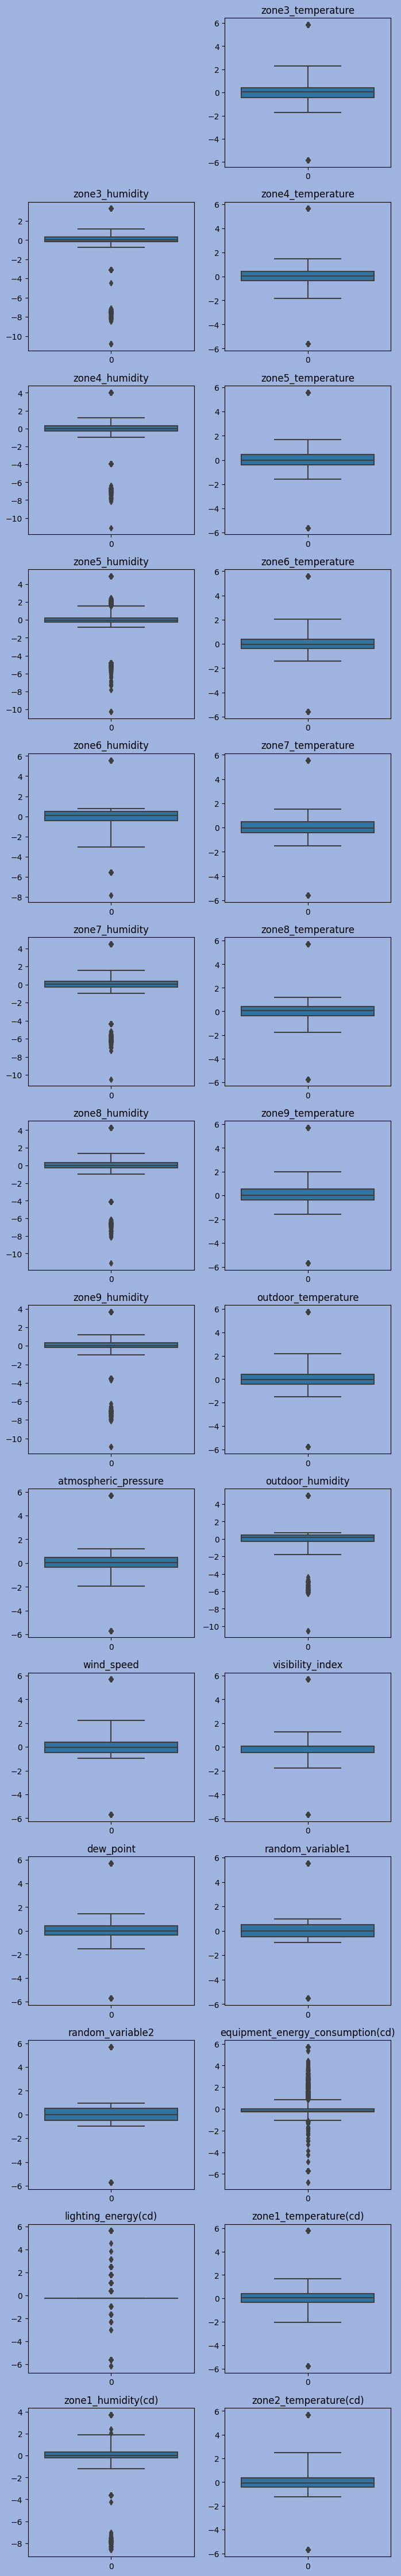

In [78]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

temp2=pd.DataFrame(scale.fit_transform(temp[num_features]), columns=num_features)

rows=int(temp2.shape[1]/2)
fig,ax=plt.subplots(nrows=rows, ncols=2, figsize=(7,45), facecolor='#9FB3DF')
for i, features in enumerate(temp2.columns):
    k, j=int(i/2), i%2

    if features!='timestamp' and k<int(temp2.shape[1]/2):
        if j==0:
            sns.boxplot(temp2[features], whis=3, ax=ax[k,j])
            plt.tight_layout()
            ax[k,j].set_title(features)
            ax[k,j].set_facecolor('#9FB3DF')
        if j!=0:
            sns.boxplot(temp2[features], whis=3, ax=ax[k,j])
            plt.tight_layout()
            ax[k,j].set_title(features)
            ax[k,j].set_facecolor('#9FB3DF')
fig.delaxes(ax[0,0])
plt.show()

* The range of inliers for maximum features is [-2, 2]
* Data should be scaled down before removing the outlier.

### 9.2 Checking outlier spread in Dataset

In [95]:
# Creating a temporary dataset which contains only numeric features
temp2=temp[num_features]
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Imputing values before detecting outliers
knn_imputer=KNNImputer()
temp2=pd.DataFrame(knn_imputer.fit_transform(temp2), columns=num_features)
# Scaling down dataset to analyze the range of outliers within a single scale.
scale=StandardScaler()
temp2=pd.DataFrame(scale.fit_transform(temp2), columns=temp2.columns)

from sklearn.ensemble import IsolationForest
# Performing outlier detection
iso = IsolationForest(contamination=0.15, random_state=0)  # outlier=-1, inlier=1
temp2['outlier'] = iso.fit_predict(temp2[num_features])

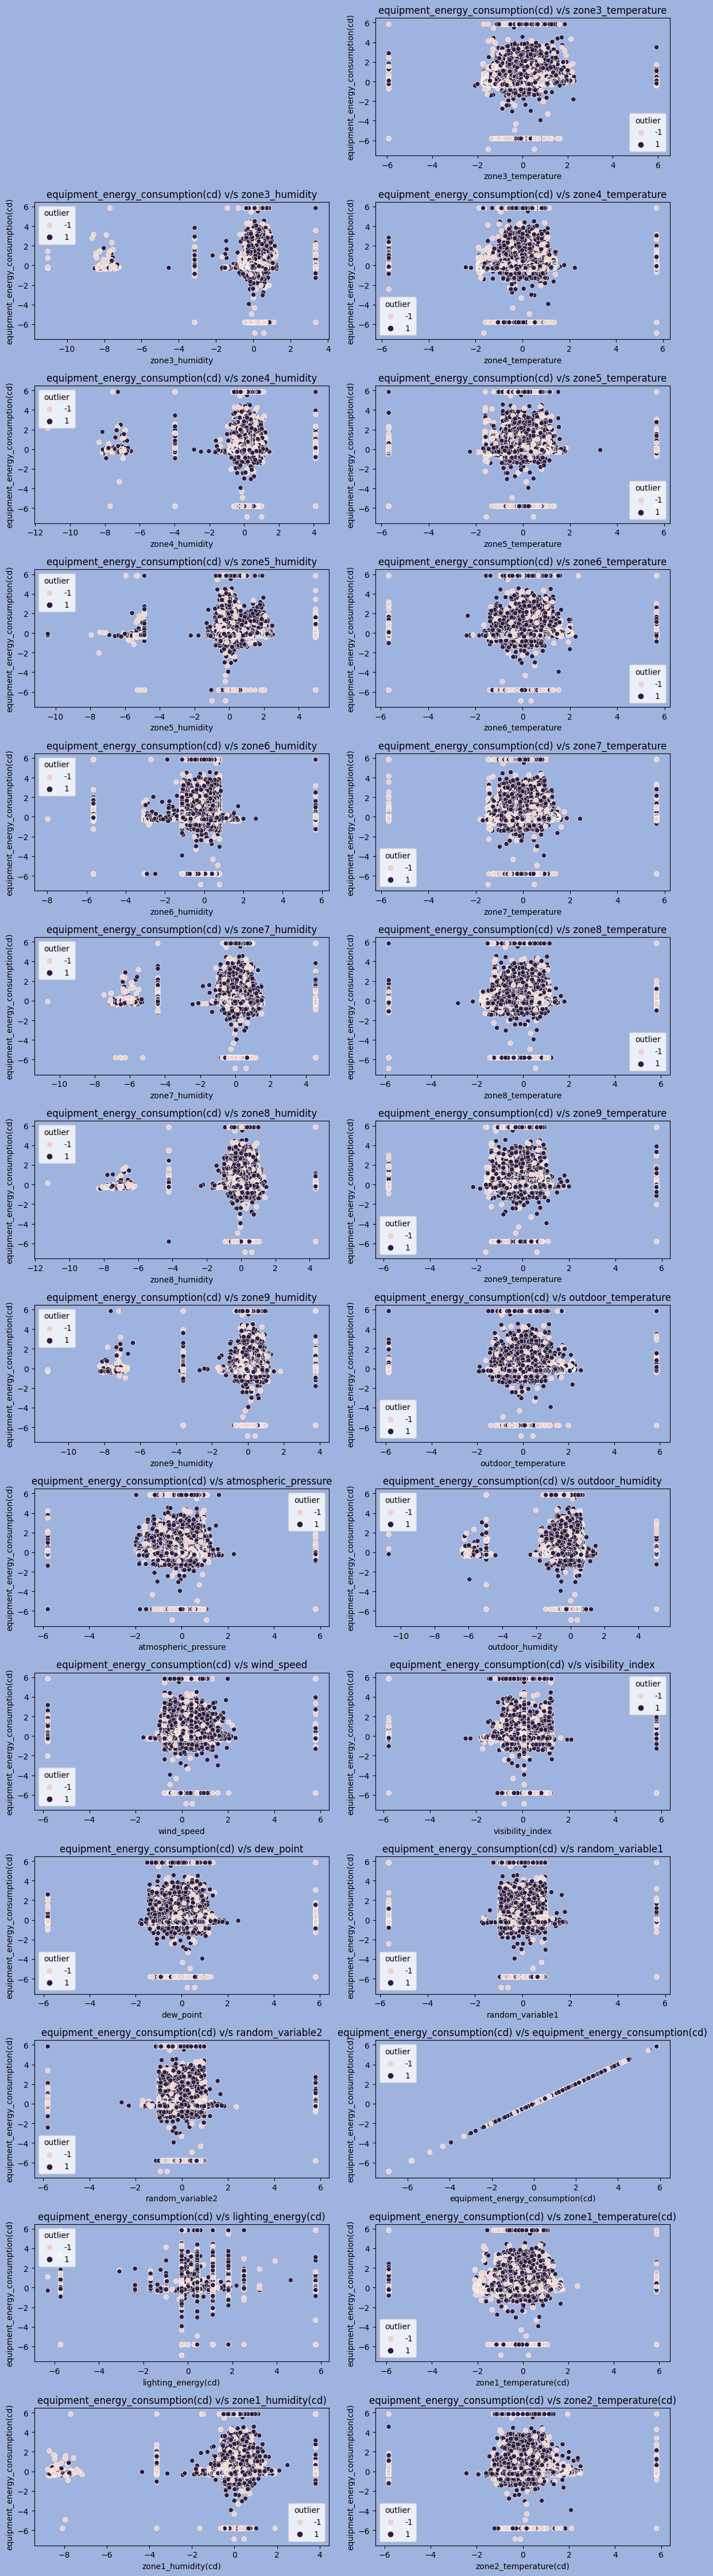

In [96]:
rows=int(temp2.shape[1]/2)
fig,ax=plt.subplots(nrows=rows, ncols=2, figsize=(12,45), facecolor='#9FB3DF')
for i, features in enumerate(temp2.columns):
    k, j=int(i/2), i%2

    if features!='timestamp' and k<int(temp2.shape[1]/2):
        if j==0:
            sns.scatterplot(x=temp2[features], y=temp2['equipment_energy_consumption(cd)'], hue=temp2['outlier'], ax=ax[k,j])
            ax[k,j].set_title(f"equipment_energy_consumption(cd) v/s {features}")
            ax[k,j].set_facecolor('#9FB3DF')
        if j!=0:
            sns.scatterplot(x=temp2[features], y=temp2['equipment_energy_consumption(cd)'], hue=temp2['outlier'], ax=ax[k,j])
            # plt.tight_layout()
            ax[k,j].set_title(f"equipment_energy_consumption(cd) v/s {features}")
            ax[k,j].set_facecolor('#9FB3DF')

plt.tight_layout()
fig.delaxes(ax[0,0])
plt.show()

* Same observation as in 9.1

## 10. Checking Data Distribution

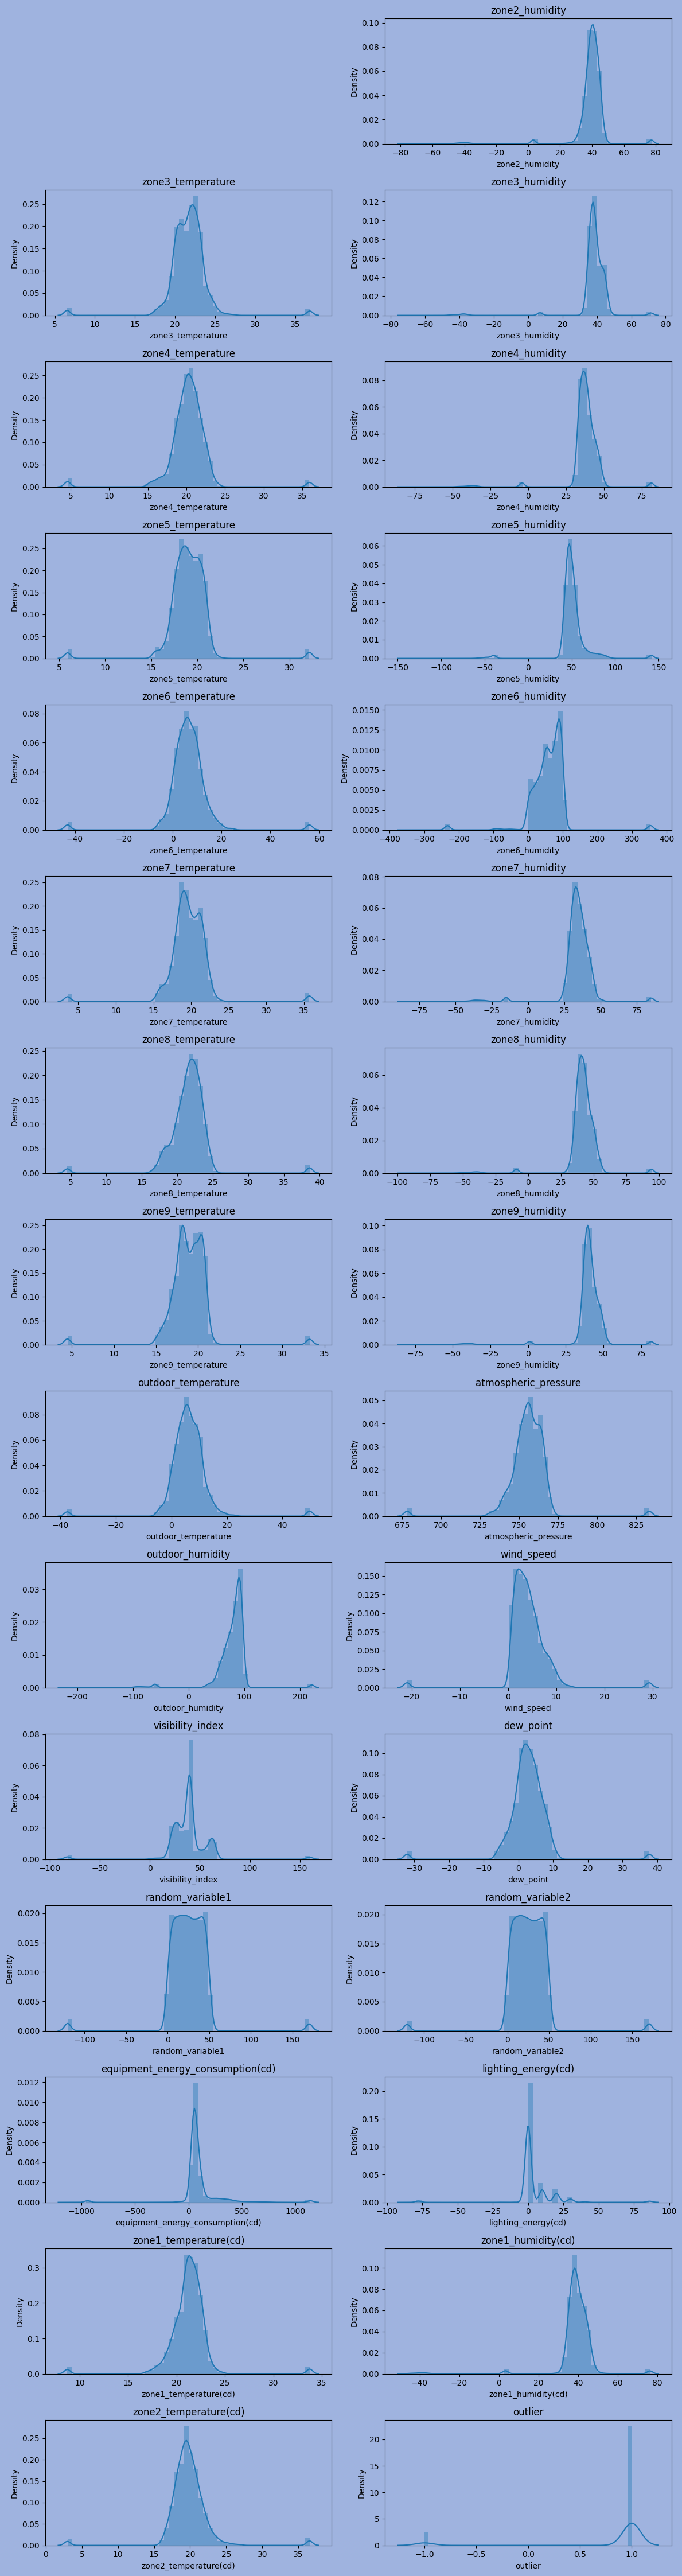

In [82]:
rows=int(temp.shape[1]/2)
fig,ax=plt.subplots(nrows=rows, ncols=2, figsize=(12,45), facecolor='#9FB3DF')
for i, features in enumerate(temp.columns):
    k, j=int(i/2), i%2

    if features!='timestamp' and k<int(temp.shape[1]/2):
        if j==0:
            sns.distplot(temp[features], bins=50, ax=ax[k,j])
            plt.tight_layout()
            ax[k,j].set_title(features)
            ax[k,j].set_facecolor('#9FB3DF')
        if j!=0:
            sns.distplot(temp[features],bins=50, ax=ax[k,j])
            plt.tight_layout()
            ax[k,j].set_title(features)
            ax[k,j].set_facecolor('#9FB3DF')
fig.delaxes(ax[0,0])
plt.show()

* Most of the features shows symmetric distribution.
* Transformation is not necessary.

## 12. Temporal Feature

In [97]:
temp['timestamp']=pd.to_datetime(temp['timestamp'])

# Extracting month, day, hours and minute from timestamp feature
temp['Month']=temp['timestamp'].dt.month
temp['Day']=temp['timestamp'].dt.day
temp['hour']=temp['timestamp'].dt.hour
temp['Minute']=temp['timestamp'].dt.minute

Text(0, 0.5, 'energy consumption')

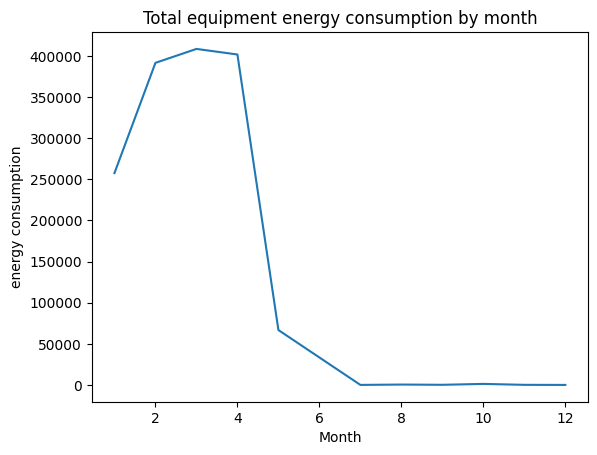

In [100]:
temp.groupby('Month')['equipment_energy_consumption(cd)'].sum().plot()
plt.title("Total equipment energy consumption by month")
plt.ylabel("energy consumption")

* Total Energy consumption decreases after 5th month

Text(0, 0.5, 'energy consumption')

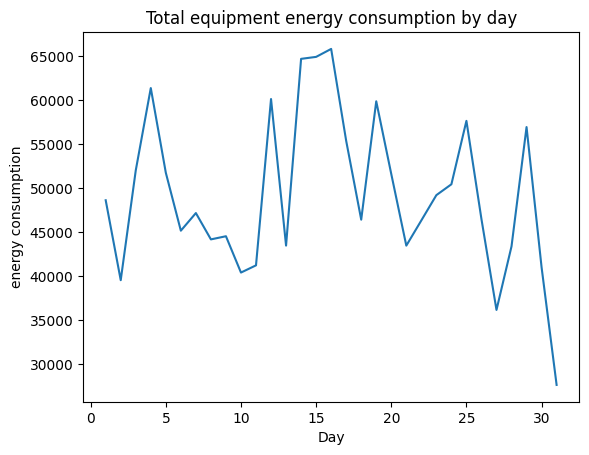

In [101]:
temp.groupby('Day')['equipment_energy_consumption(cd)'].sum().plot()
plt.title("Total equipment energy consumption by day")
plt.ylabel("energy consumption")

Text(0, 0.5, 'energy consumption')

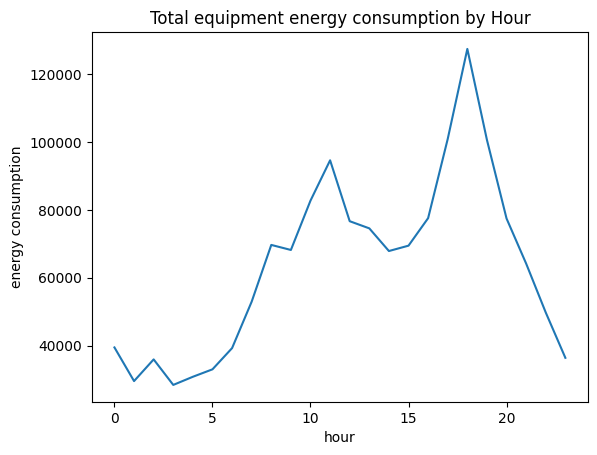

In [102]:
temp.groupby('hour')['equipment_energy_consumption(cd)'].sum().plot()
plt.title("Total equipment energy consumption by Hour")
plt.ylabel("energy consumption")

* Significant increase in energy consumption 0-18 hours

Text(0, 0.5, 'energy consumption')

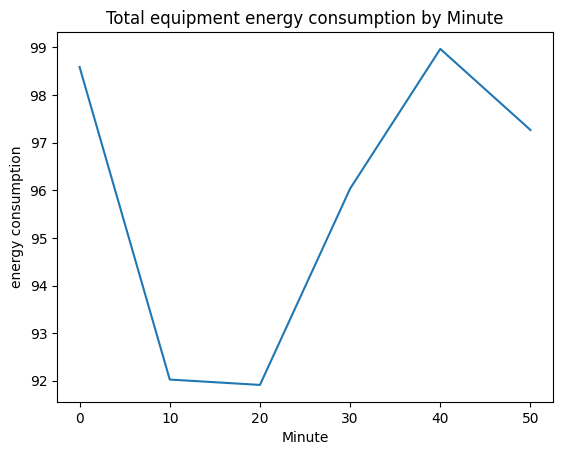

In [103]:
temp.groupby('Minute')['equipment_energy_consumption(cd)'].mean().plot()
plt.title("Total equipment energy consumption by Minute")
plt.ylabel("energy consumption")

    Final Observation for Temporal features:
    1.  Energy consumption is more in between 0-18 hours.
    2.  Total Energy consumption decreases after 5th month

## 11. Features Correlation

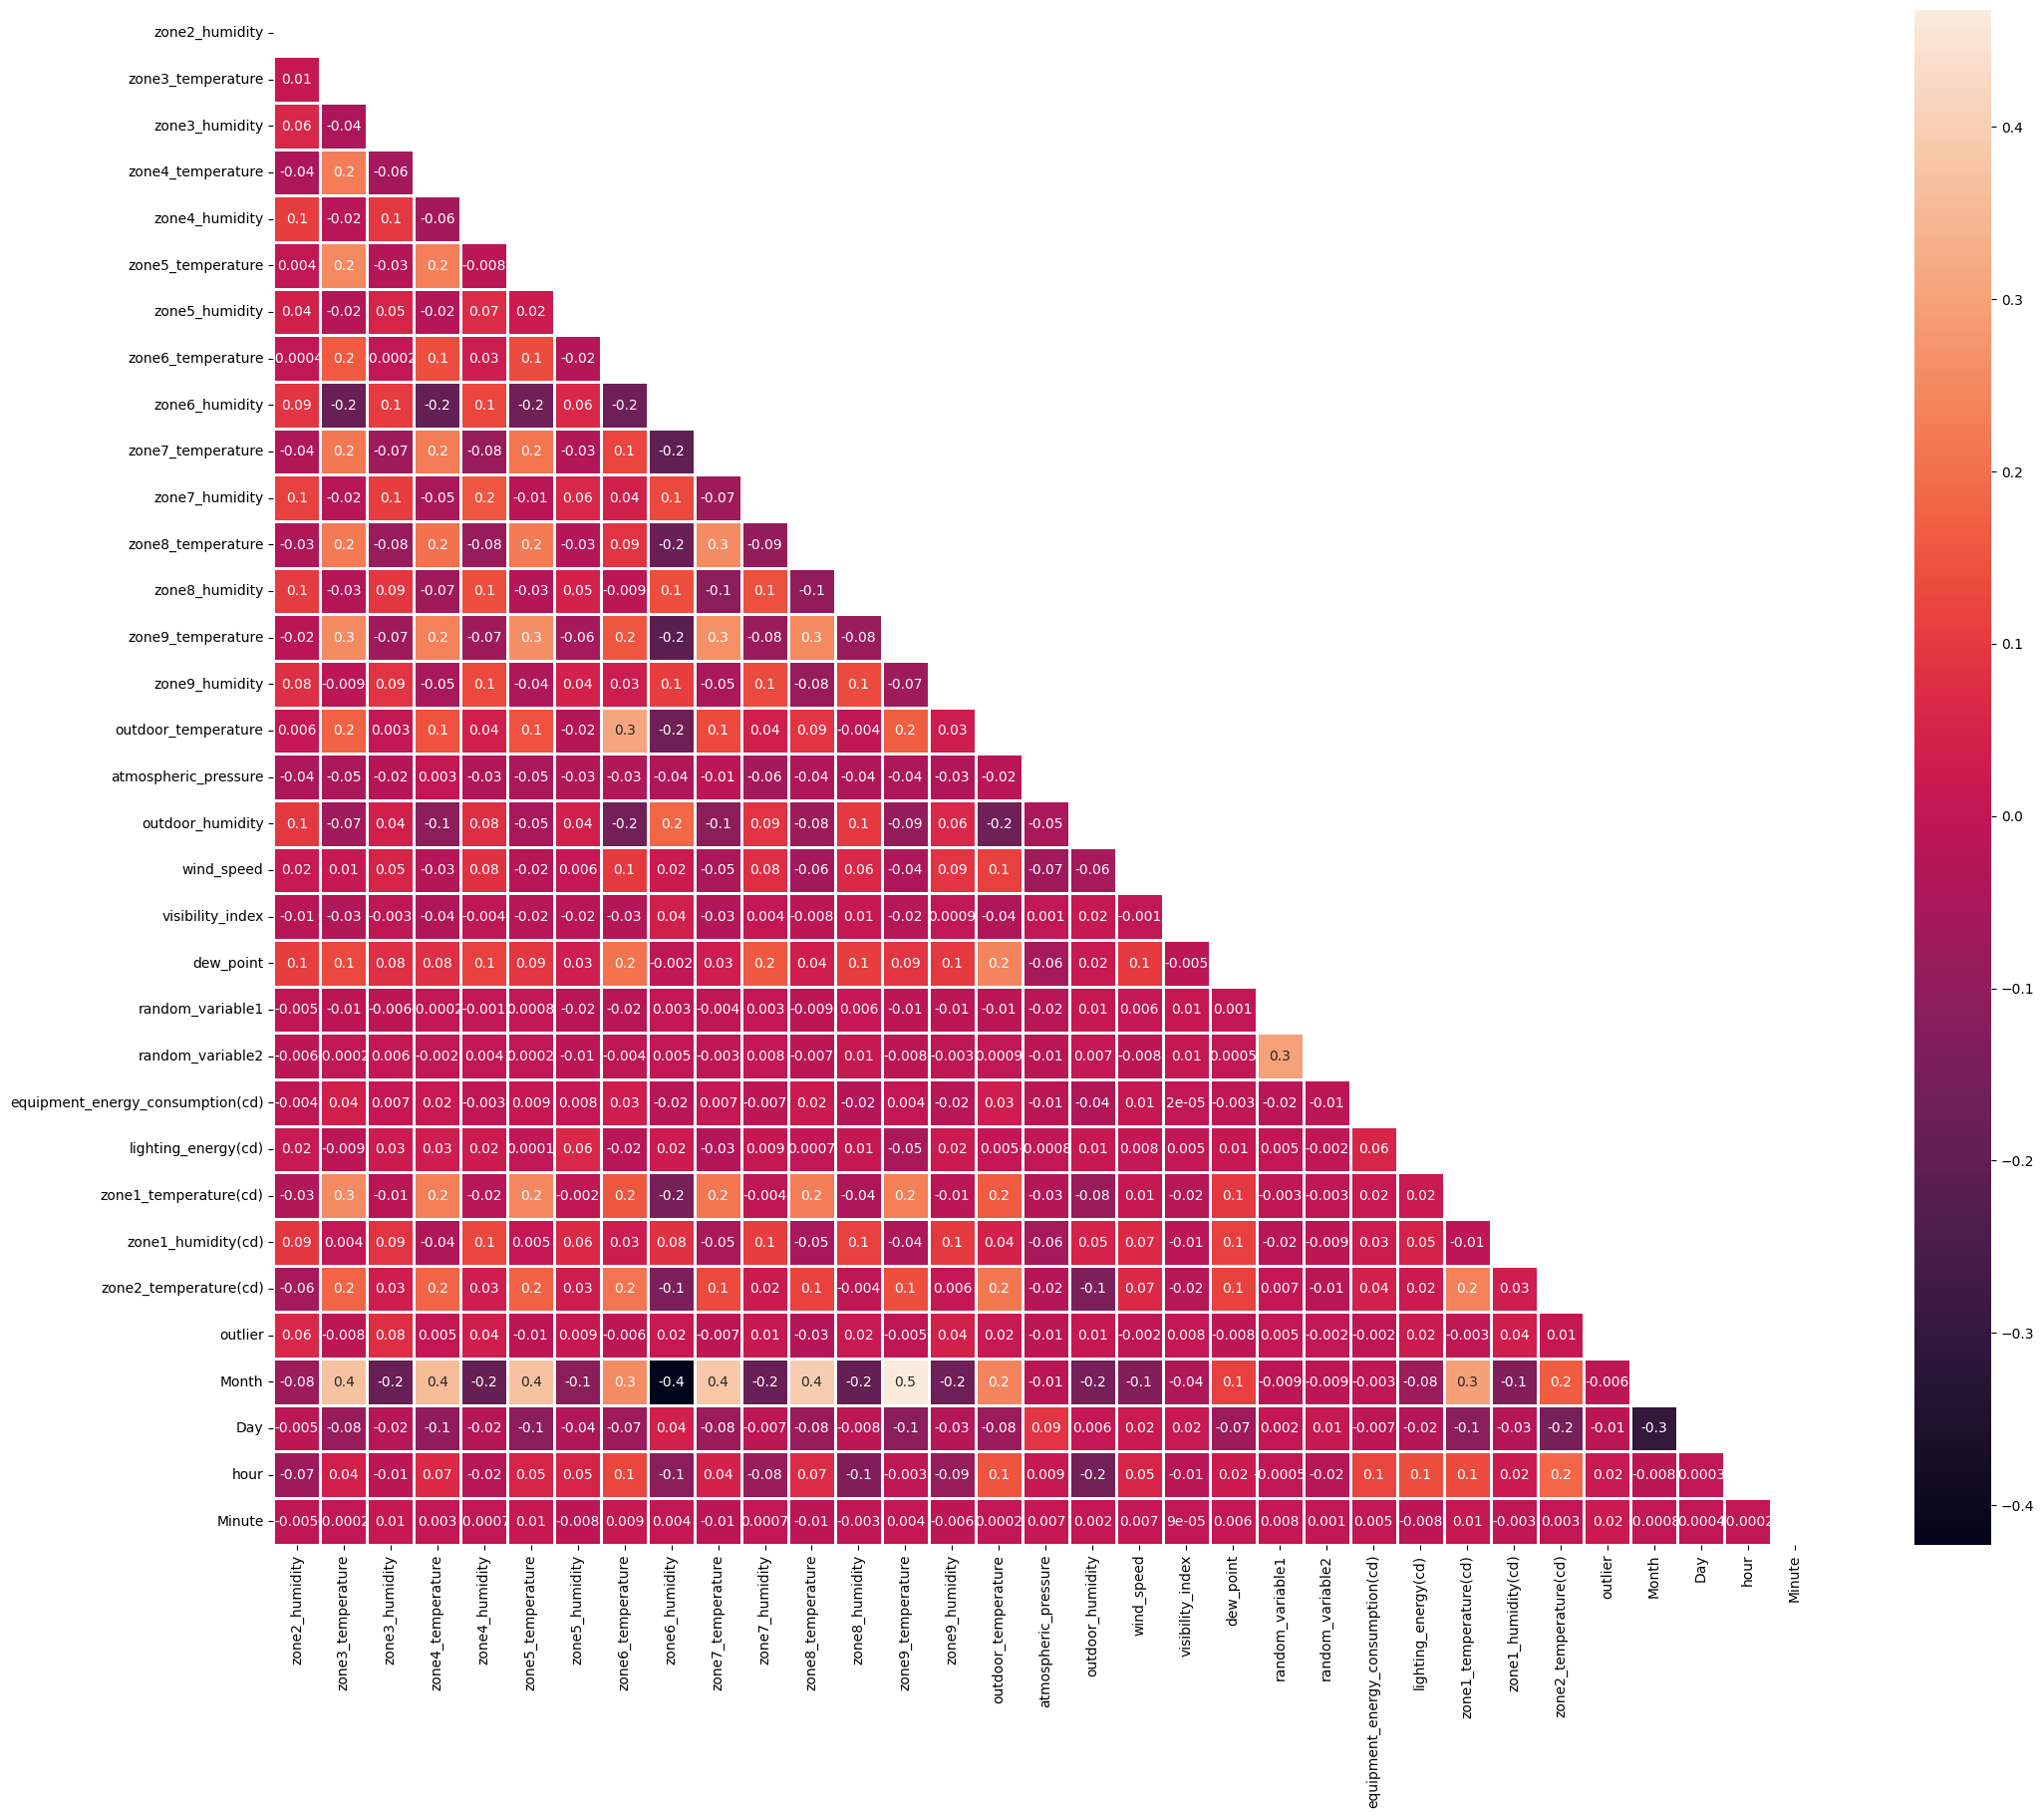

In [104]:
num_features=[features for features in temp.columns if features not in ['timestamp']]

plt.figure(figsize=(25, 20))
masked=np.triu(temp[num_features].corr())
sns.heatmap(temp[num_features].corr(), annot=True, linewidths=1, fmt='.1g', mask=masked)
plt.show()

* Month Feature shows a slighter strong correlation as compared to other features

# Data Preprocessing

In [105]:
df2=df.copy()

In [106]:
df2.head()

timestamp equipment_energy_consumption     lighting_energy  \
0  2016-01-11 17:00:00                         60.0  -77.78778596503064   
1  2016-01-11 17:10:00                         60.0                30.0   
2  2016-01-11 17:20:00                         50.0                30.0   
3  2016-01-11 17:30:00                         50.0                40.0   
4  2016-01-11 17:40:00                         60.0                40.0   

   zone1_temperature     zone1_humidity zone2_temperature  zone2_humidity  \
0  33.74660933896648  47.59666666666671              19.2       44.790000   
1              19.89  46.69333333333329              19.2       44.722500   
2              19.89               46.3              19.2       44.626667   
3  33.74660933896648   46.0666666666667              19.2       44.590000   
4              19.89  46.33333333333329              19.2       44.530000   

   zone3_temperature  zone3_humidity  zone4_temperature  zone4_humidity  \
0              19.79             NaN          19.000000       45.566667   
1              19.79       44.790000          19.000000       45.992500   
2              19.79       44.933333          35.921144       45.890000   
3              19.79       45.000000                NaN       45.723333   
4              19.79       45.000000          18.890000       45.530000   

   zone5_temperature  zone5_humidity  zone6_temperature  zone6_humidity  \
0          17.166667           55.20                NaN       84.256667   
1          17.166667           55.20           6.833333       84.063333   
2                NaN           55.09           6.560000       83.156667   
3          17.166667           55.09           6.433333       83.423333   
4          17.200000           55.09           6.366667       84.893333   

   zone7_temperature  zone7_humidity  zone8_temperature  zone8_humidity  \
0          17.200000       41.626667               18.2       48.900000   
1          17.200000             NaN               18.2       48.863333   
2          17.200000       41.433333               18.2       48.730000   
3          17.133333       41.290000               18.1       94.385668   
4          17.200000       41.230000               18.1       48.590000   

   zone9_temperature  zone9_humidity  outdoor_temperature  \
0          17.033333           45.53             6.600000   
1          17.066667           45.56             6.483333   
2          17.000000           45.50             6.366667   
3          17.000000           45.40             6.250000   
4           4.476511           45.40             6.133333   

   atmospheric_pressure  outdoor_humidity  wind_speed  visibility_index  \
0                 733.5              92.0    7.000000         63.000000   
1                 733.6              92.0    6.666667         59.166667   
2                 733.7              92.0    6.333333         55.333333   
3                 733.8              92.0    6.000000         51.500000   
4                 733.9              92.0    5.666667         47.666667   

   dew_point  random_variable1  random_variable2  
0   5.300000         13.275433         13.275433  
1   5.200000         18.606195         18.606195  
2   5.100000         28.642668         28.642668  
3  37.673716         45.410389         45.410389  
4   4.900000         10.084097         10.084097

## 1. Removing Duplicate Data

In [107]:
df2.drop_duplicates(inplace=True)

## 2. Handling object datatype features

In [108]:
# Replacing Non numeric values like ??, unknown etc. with Nan
df2[['equipment_energy_consumption(cd)', 'lighting_energy(cd)', 'zone1_temperature(cd)', 'zone1_humidity(cd)', 'zone2_temperature(cd)']]=df2[['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']].replace(r'[^0-9.-]',np.nan, regex=True)
# Typecasting object datatype as float
df2[['equipment_energy_consumption(cd)', 'lighting_energy(cd)', 'zone1_temperature(cd)', 'zone1_humidity(cd)', 'zone2_temperature(cd)']]=df2[['equipment_energy_consumption(cd)', 'lighting_energy(cd)', 'zone1_temperature(cd)', 'zone1_humidity(cd)', 'zone2_temperature(cd)']].astype(float)
# Dropping unnecessary features
df2.drop(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature'],axis=1, inplace=True)

## 3. Handling temporal features

In [110]:
df2['timestamp']=pd.to_datetime(df2['timestamp'])

# Extracting month, day, hours and minute from timestamp feature
df2['Month']=df2['timestamp'].dt.month
df2['Day']=df2['timestamp'].dt.day
df2['hour']=df2['timestamp'].dt.hour
df2['Minute']=df2['timestamp'].dt.minute

# Dropping unnecessary features
df2.drop(['timestamp', 'Minute', 'Day'],axis=1, inplace=True)

In [112]:
df2.head()

zone2_humidity  zone3_temperature  zone3_humidity  zone4_temperature  \
0       44.790000              19.79             NaN          19.000000   
1       44.722500              19.79       44.790000          19.000000   
2       44.626667              19.79       44.933333          35.921144   
3       44.590000              19.79       45.000000                NaN   
4       44.530000              19.79       45.000000          18.890000   

   zone4_humidity  zone5_temperature  zone5_humidity  zone6_temperature  \
0       45.566667          17.166667           55.20                NaN   
1       45.992500          17.166667           55.20           6.833333   
2       45.890000                NaN           55.09           6.560000   
3       45.723333          17.166667           55.09           6.433333   
4       45.530000          17.200000           55.09           6.366667   

   zone6_humidity  zone7_temperature  zone7_humidity  zone8_temperature  \
0       84.256667          17.200000       41.626667               18.2   
1       84.063333          17.200000             NaN               18.2   
2       83.156667          17.200000       41.433333               18.2   
3       83.423333          17.133333       41.290000               18.1   
4       84.893333          17.200000       41.230000               18.1   

   zone8_humidity  zone9_temperature  zone9_humidity  outdoor_temperature  \
0       48.900000          17.033333           45.53             6.600000   
1       48.863333          17.066667           45.56             6.483333   
2       48.730000          17.000000           45.50             6.366667   
3       94.385668          17.000000           45.40             6.250000   
4       48.590000           4.476511           45.40             6.133333   

   atmospheric_pressure  outdoor_humidity  wind_speed  visibility_index  \
0                 733.5              92.0    7.000000         63.000000   
1                 733.6              92.0    6.666667         59.166667   
2                 733.7              92.0    6.333333         55.333333   
3                 733.8              92.0    6.000000         51.500000   
4                 733.9              92.0    5.666667         47.666667   

   dew_point  random_variable1  random_variable2  \
0   5.300000         13.275433         13.275433   
1   5.200000         18.606195         18.606195   
2   5.100000         28.642668         28.642668   
3  37.673716         45.410389         45.410389   
4   4.900000         10.084097         10.084097   

   equipment_energy_consumption(cd)  lighting_energy(cd)  \
0                              60.0           -77.787786   
1                              60.0            30.000000   
2                              50.0            30.000000   
3                              50.0            40.000000   
4                              60.0            40.000000   

   zone1_temperature(cd)  zone1_humidity(cd)  zone2_temperature(cd)  Month  \
0              33.746609           47.596667                   19.2      1   
1              19.890000           46.693333                   19.2      1   
2              19.890000           46.300000                   19.2      1   
3              33.746609           46.066667                   19.2      1   
4              19.890000           46.333333                   19.2      1   

   hour  
0    17  
1    17  
2    17  
3    17  
4    17

## 4. Dropping datapoints having missing target feature values

In [113]:
nan_index=df2[df2['equipment_energy_consumption(cd)'].isnull()].index
df2.drop(nan_index,inplace=True)

## 5. Handling missing values

In [115]:
imputer=KNNImputer()
df2=pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

Y=df2['equipment_energy_consumption(cd)']
X=df2.drop('equipment_energy_consumption(cd)', axis=1)

## 6. Down-Scaling dataset

In [120]:
scale=StandardScaler()

scaled_df2=pd.DataFrame(scale.fit_transform(X), columns=X.columns)
scaled_df2['equipment_energy_consumption(cd)']=Y

## 7. Removing outliers

In [129]:
new_df=scaled_df2.loc[(scaled_df2['zone2_humidity']>(-2.5))& (scaled_df2['zone2_humidity']<2.5),:]

## 8. Performing Training and Test Data splitting

In [135]:
X=new_df.drop('equipment_energy_consumption(cd)',axis=1)
Y=new_df['equipment_energy_consumption(cd)']

In [136]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.1, random_state=42)

## 9. Performing Feature Selection

In [138]:
selector=SelectKBest(score_func=mutual_info_regression, k=16)
best_x_train=selector.fit_transform(x_train, y_train)
best_feature_names=x_train.columns[selector.get_support()]

In [141]:
best_feature_names

Index(['zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'atmospheric_pressure',
       'zone1_temperature(cd)', 'zone1_humidity(cd)', 'zone2_temperature(cd)',
       'hour'],
      dtype='object')

In [142]:
best_x_train=pd.DataFrame(best_x_train, columns=best_feature_names)
best_x_test=pd.DataFrame(selector.transform(x_test), columns=best_feature_names)

# Model Training

In [207]:
# Performing Hyper-parameter tuning
rf=RandomForestRegressor()

params={
    'max_depth':[12,14,16], 'max_features': ['sqrt', 'log2'],
}

gridcv=GridSearchCV(rf, param_grid=params, scoring='neg_mean_absolute_error', cv=15)

In [209]:
gridcv.fit(best_x_train, y_train)

GridSearchCV(cv=15, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 14, 16],
                         'max_features': ['sqrt', 'log2']},
             scoring='neg_mean_absolute_error')

In [210]:
gridcv.best_params_

{'max_depth': 14, 'max_features': 'log2'}

In [211]:
rf_train_pred=gridcv.predict(best_x_train)
rf_test_pred=gridcv.predict(best_x_test)

# Performance Metrics

In [217]:
print("Random Forest regression training score:",r2_score(y_train, rf_train_pred))
print("Random Forest regression test score:",r2_score(y_test, rf_test_pred))
print("Random Forest regression train MAE score:",mean_absolute_error(y_train, rf_train_pred))
print("Random Forest regression test MAE score",mean_absolute_error(y_test, rf_test_pred))

Random Forest regression training score: 0.6438423656485532
Random Forest regression test score: 0.07126193402184389
Random Forest regression train MAE score: 46.95041131156825
Random Forest regression test MAE score 71.79229342393161


# Why RandomForestRegression Algorithm?

* After Testing various algorithm, the random forest regression algorithm performs well compared to other algorithms.
* Random Forest Algorithm uses number of decision trees to predict output based on given inputs and the final output will be the average of all the decision trees output.
* Second point ensures the robustness of algorithm in case of outliers presence in dataset.

# Outcomes

1. Dataset contains a large number of noise and outliers.
2. Contains missing values also. (Perhaps due to sensor fault.)
3. No correlation between features of dataset. Hence it also makes it difficult predict accurate energy consumption estimate. Outliers are also a huge cause.
4. 68 redundant datapoints are also found in dataset.
5. Model achieved R2-score and MAE w.r.t 0.07 and 71.79

# Suggestion

1. Install motion sensors for lights to reduce consumption of energy.
2. Maintain temperature in different zones with proper ventillation or using other conditioning system.
3. Set energy consumption threshold based on behavioral energy consumption in a timespan. It helps in monitoring abnormal usage of energy and also finding the cause of issue.